In [5]:
pip install pandas mlxtend openpyxl


In [6]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Load the dataset
df = pd.read_excel("Online retail.xlsx")

# Convert each transaction string to a list
transactions = df.iloc[:, 0].apply(lambda x: x.split(','))

# One-hot encode
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Apply Apriori
frequent_itemsets = apriori(df_encoded, min_support=0.02, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Filter rules
filtered_rules = rules[(rules['confidence'] >= 0.3) & (rules['lift'] > 1)]

# Display top rules
print(filtered_rules.sort_values(by="lift", ascending=False).head(10))

# Display top 10 rules sorted by lift
print(filtered_rules.sort_values(by="lift", ascending=False).head(10))

filtered_rules = rules[(rules['confidence'] >= 0.3) & (rules['lift'] > 1)]


            antecedents      consequents  antecedent support  \
66        (ground beef)      (spaghetti)            0.098267   
88          (olive oil)      (spaghetti)            0.065733   
81               (soup)  (mineral water)            0.050533   
1             (burgers)           (eggs)            0.087200   
94           (tomatoes)      (spaghetti)            0.068400   
75          (olive oil)  (mineral water)            0.065733   
65        (ground beef)  (mineral water)            0.098267   
29        (cooking oil)  (mineral water)            0.051067   
11            (chicken)  (mineral water)            0.060000   
57  (frozen vegetables)  (mineral water)            0.095333   

    consequent support   support  confidence      lift  representativity  \
66            0.174133  0.039200    0.398915  2.290857               1.0   
88            0.174133  0.022933    0.348884  2.003547               1.0   
81            0.238267  0.023067    0.456464  1.915771             

### 📊 Rule Visualization: Top 10 Rules by Lift

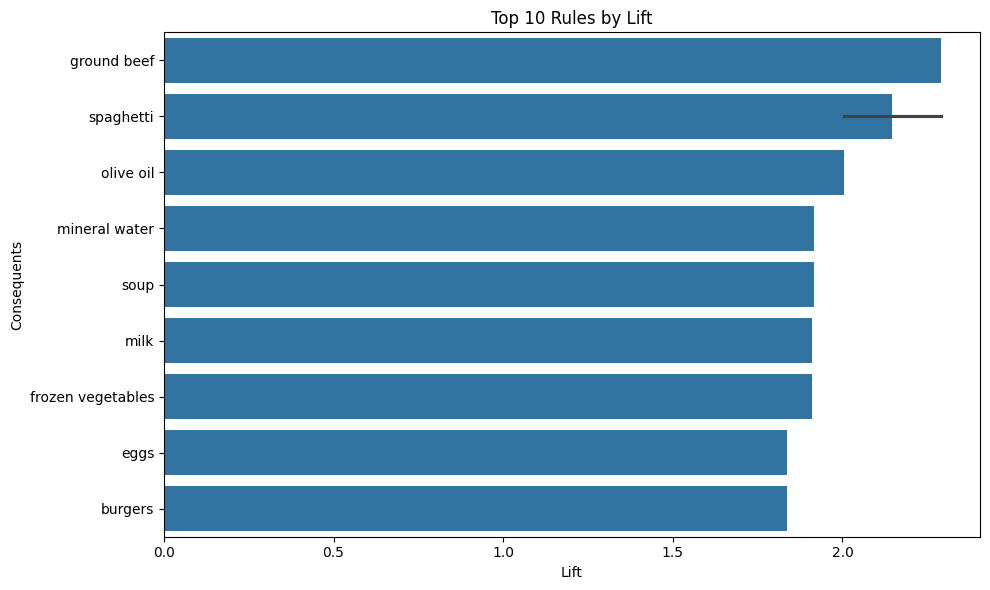

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert frozensets to strings for better readability
rules['antecedents'] = rules['antecedents'].apply(lambda x: ', '.join(list(x)))
rules['consequents'] = rules['consequents'].apply(lambda x: ', '.join(list(x)))

# Top 10 rules by lift
top_rules = rules.sort_values('lift', ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x='lift', y='consequents', data=top_rules)
plt.title('Top 10 Rules by Lift')
plt.xlabel('Lift')
plt.ylabel('Consequents')
plt.tight_layout()
plt.show()

In [8]:
# Display top 10 rules sorted by lift
print(filtered_rules.sort_values(by="lift", ascending=False).head(10))


            antecedents      consequents  antecedent support  \
66        (ground beef)      (spaghetti)            0.098267   
88          (olive oil)      (spaghetti)            0.065733   
81               (soup)  (mineral water)            0.050533   
1             (burgers)           (eggs)            0.087200   
94           (tomatoes)      (spaghetti)            0.068400   
75          (olive oil)  (mineral water)            0.065733   
65        (ground beef)  (mineral water)            0.098267   
29        (cooking oil)  (mineral water)            0.051067   
11            (chicken)  (mineral water)            0.060000   
57  (frozen vegetables)  (mineral water)            0.095333   

    consequent support   support  confidence      lift  representativity  \
66            0.174133  0.039200    0.398915  2.290857               1.0   
88            0.174133  0.022933    0.348884  2.003547               1.0   
81            0.238267  0.023067    0.456464  1.915771             

In [9]:
filtered_rules = rules[(rules['confidence'] >= 0.3) & (rules['lift'] > 1)]
top10 = filtered_rules.sort_values(by="lift", ascending=False).head(10)
print(top10[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


          antecedents    consequents   support  confidence      lift
66        ground beef      spaghetti  0.039200    0.398915  2.290857
88          olive oil      spaghetti  0.022933    0.348884  2.003547
81               soup  mineral water  0.023067    0.456464  1.915771
1             burgers           eggs  0.028800    0.330275  1.837585
94           tomatoes      spaghetti  0.020933    0.306043  1.757520
75          olive oil  mineral water  0.027467    0.417850  1.753707
65        ground beef  mineral water  0.040933    0.416554  1.748266
29        cooking oil  mineral water  0.020133    0.394256  1.654683
11            chicken  mineral water  0.022800    0.380000  1.594852
57  frozen vegetables  mineral water  0.035733    0.374825  1.573133
